# `scipy.optimize` – Optimization and Root Finding

The `scipy.optimize` module in SciPy provides tools for solving optimization and root-finding problems, useful for tasks such as parameter estimation, curve fitting, and various machine learning applications. This tutorial includes:
- `minimize` and `fmin` for function minimization.
- `root` for solving equations.
- `curve_fit` for non-linear curve fitting.

### 1. Minimization of Functions

#### 1.1. `minimize()`
The `minimize` function performs minimization of a scalar or multivariate function using various methods such as `'BFGS'`, `'Nelder-Mead'`, or `'Powell'`.

**Syntax**:
```python
from scipy.optimize import minimize
result = minimize(func, x0, method='BFGS', options={})
```
func: The function to minimize.
x0: Initial guess for the solution.
method: Optimization method (default is 'BFGS').
options: Additional options for tuning the optimization process.

In [3]:
from scipy.optimize import minimize

def f(x):
    return (x - 3)**2 + 2

result = minimize(f, x0=0)
print("Minimum:", result.x)  # Output should be close to x = 3

Minimum: [3.00000003]


### 1.2. `fmin()`
The `fmin` function performs downhill simplex minimization. It’s especially useful for unconstrained minimization problems.

**Syntax**:

```python
from scipy.optimize import fmin
```
- result = fmin(func, x0)
- func: The function to minimize.
- x0: Initial guess for the solution.

In [4]:
from scipy.optimize import fmin

def f(x):
    return (x - 3)**2 + 2

result = fmin(f, x0=0)
print("Minimum:", result)  # Output should be close to x = 3

Optimization terminated successfully.
         Current function value: 2.000000
         Iterations: 28
         Function evaluations: 56
Minimum: [3.]


## 2. Root-Finding
### 2.1. `root()`
The root function finds the roots of a function or system of equations, where the function equals zero.

**Syntax**:

```python
from scipy.optimize import root
result = root(func, x0, method='hybr', options={})
```
- func: Function whose root is to be found.
- x0: Initial guess.
- method: Root-finding method (e.g., 'hybr', 'broyden1').
- options: Additional options.

In [8]:
from scipy.optimize import root

def f(x):
    return x**2 - 9

result = root(f, x0=-1)
print(result)  # Output should be close to x = 3 or x = -3

 message: The solution converged.
 success: True
  status: 1
     fun: [-2.558e-13]
       x: [-3.000e+00]
  method: hybr
    nfev: 12
    fjac: [[-1.000e+00]]
       r: [ 6.000e+00]
     qtf: [ 6.706e-08]


## 3. Non-Linear Curve Fitting
### 3.1. `curve_fit()`
The curve_fit function performs non-linear curve fitting using a user-defined function and data.

**Syntax**:

```python
from scipy.optimize import curve_fit
params, covariance = curve_fit(func, xdata, ydata, p0=None)
```
- func: The model function, e.g., a polynomial or exponential function.
- xdata, ydata: Data for fitting.
- p0: Initial guess for the parameters.

In [9]:
from scipy.optimize import curve_fit
import numpy as np

# Define the model function
def model(x, a, b):
    return a * np.exp(b * x)

# Generate synthetic data
xdata = np.linspace(0, 4, 50)
ydata = model(xdata, 2, 0.5) + 0.1 * np.random.normal(size=xdata.size)

# Fit the data
params, covariance = curve_fit(model, xdata, ydata, p0=(1, 0.1))
print("Fitted parameters:", params)  # Should be close to (2, 0.5)

Fitted parameters: [2.00245658 0.49869883]


Fitted parameters: [1.9929745  0.50197469]


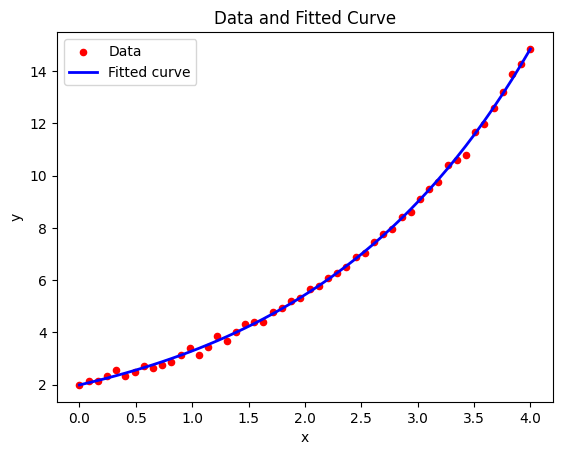

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function
def model(x, a, b):
    return a * np.exp(b * x)

# Generate synthetic data
xdata = np.linspace(0, 4, 50)
ydata = model(xdata, 2, 0.5) + 0.1 * np.random.normal(size=xdata.size)

# Fit the data
params, covariance = curve_fit(model, xdata, ydata, p0=(1, 0.1))

# Print the fitted parameters
print("Fitted parameters:", params)  # Should be close to (2, 0.5)

# Generate the fitted curve
yfit = model(xdata, *params)

# Plot the data and the fitted curve
plt.scatter(xdata, ydata, label='Data', color='red', s=20)
plt.plot(xdata, yfit, label='Fitted curve', color='blue', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Fitted Curve')
plt.show()


## 4. Linear Programming with `scipy.optimize.linprog`

The `scipy.optimize.linprog` function is used to solve linear programming problems in Python. It helps you find the values of decision variables that optimize a linear objective function, subject to linear constraints.

### Syntax

```python
scipy.optimize.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', options=None)
```
### Parameters:

- **c**: `array_like, shape (n,)`
  - Coefficients of the linear objective function to be minimized. For maximization, you should provide the negative of the coefficients.

- **A_ub**: `array_like, shape (m, n)`, optional
  - Coefficients of the inequality constraints in the form \( A \cdot x \leq b \).

- **b_ub**: `array_like, shape (m,)`, optional
  - Right-hand side of the inequality constraints.

- **A_eq**: `array_like, shape (p, n)`, optional
  - Coefficients of the equality constraints in the form \( A \cdot x = b \).

- **b_eq**: `array_like, shape (p,)`, optional
  - Right-hand side of the equality constraints.

- **bounds**: `sequence of (min, max) pairs, optional`
  - Bounds for variables, in the form \((min, max)\). If a variable is not bounded, use `None` for that variable's bounds.

- **method**: `str, optional`
  - The method to use for optimization. Available options:
    - `'simplex'` (legacy method, generally used for small problems),
    - `'revised simplex'` (a more efficient version of the simplex method),
    - `'interior-point'` (a more modern, interior-point algorithm),
    - `'highs'` (default, a more robust and efficient solver based on interior-point methods).

- **options**: `dict, optional`
  - Additional options to customize the solver's behavior, such as tolerance (`tol`) and iteration limits.

### Example Problem

Niki holds two part-time jobs, Job I and Job II. She cannot work more than 12 hours a week in total. For every hour she works at Job I, she needs 2 hours of preparation, and for every hour at Job II, she needs 1 hour of preparation. She cannot spend more than 16 hours on preparation. Niki earns $40 per hour at Job I and $30 per hour at Job II. We need to determine the number of hours Niki should work at each job to maximize her income.

### Objective:
Maximize the income, which is given by:

\[
\text{Income} = 40x + 30y
\]

Where:

- \( x \) is the number of hours worked at Job I,
- \( y \) is the number of hours worked at Job II.

### Constraints:
1. \( x + y \leq 12 \) (Total working hours constraint)
2. \( 2x + y \leq 16 \) (Preparation time constraint)
3. \( x \geq 0 \), \( y \geq 0 \) (Non-negativity constraint)


In [2]:
from scipy.optimize import linprog

# Coefficients of the objective function (negative for maximization)
c = [-40, -30]

# Coefficients of the inequality constraints
A = [
    [1, 1],  # x + y <= 12
    [2, 1],  # 2x + y <= 16
]

# Right-hand side values for the inequality constraints
b = [12, 16]

# Bounds for the variables: x >= 0, y >= 0
x_bounds = (0, None)
y_bounds = (0, None)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Check if the solution was successful
if result.success:
    x, y = result.x  # Optimal values of x and y
    print(f"Optimal number of hours for Job I (x): {x:.2f}")
    print(f"Optimal number of hours for Job II (y): {y:.2f}")
    print(f"Maximum income: ${-result.fun:.2f}")
else:
    print("No solution found.")


Optimal number of hours for Job I (x): 4.00
Optimal number of hours for Job II (y): 8.00
Maximum income: $400.00


In [3]:
import scipy

In [4]:
dir(scipy.optimize)

['BFGS',
 'Bounds',
 'BroydenFirst',
 'HessianUpdateStrategy',
 'InverseJacobian',
 'KrylovJacobian',
 'LbfgsInvHessProduct',
 'LinearConstraint',
 'NoConvergence',
 'NonlinearConstraint',
 'OptimizeResult',
 'OptimizeWarning',
 'RootResults',
 'SR1',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_basinhopping',
 '_bglu_dense',
 '_cobyla',
 '_cobyla_py',
 '_cobyqa_py',
 '_constraints',
 '_dcsrch',
 '_differentiable_functions',
 '_differentialevolution',
 '_direct',
 '_direct_py',
 '_dual_annealing',
 '_group_columns',
 '_hessian_update_strategy',
 '_highs',
 '_isotonic',
 '_lbfgsb',
 '_lbfgsb_py',
 '_linesearch',
 '_linprog',
 '_linprog_doc',
 '_linprog_highs',
 '_linprog_ip',
 '_linprog_rs',
 '_linprog_simplex',
 '_linprog_util',
 '_lsap',
 '_lsq',
 '_milp',
 '_minimize',
 '_minpack',
 '_minpack_py',
 '_moduleTNC',
 '_nnls',
 '_nonlin',
 '_numdiff',
 '_optimize',
 '_pava_pybind',
 '_qap',
 '